# Final Project Submission

Please fill out:
* Student name: Marife Ramoran
* Student pace: Self paced
* Scheduled project review date/time: 17 December 2023
* Instructor name: Hardik Idnani
* Blog post URL:
***


<a id='8.5'></a>
<p style="font-size: 20px; color: white; font-family: 'Comic Sans MS'; text-align: center; background-color: gray; border-radius: 8px 8px;"><strong>Flight Price Prediction</strong></p>


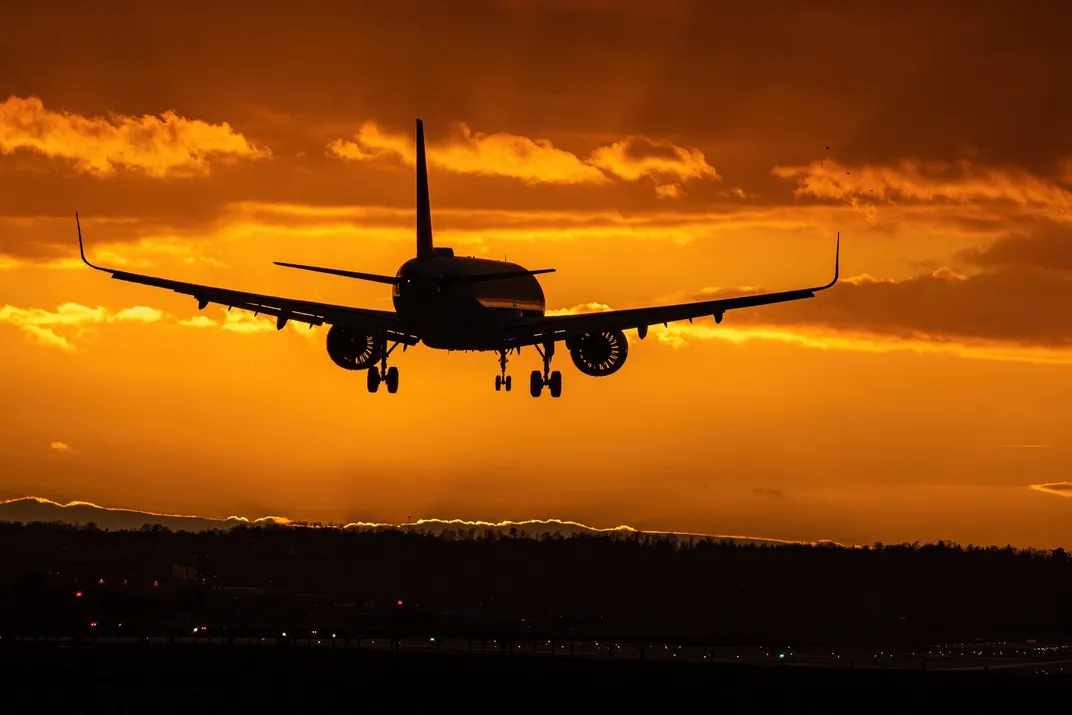

## Overview
***
In this project, we aim to predict domestic flight prices in India for the period between March 2019 and July 2019 using linear regression and data analysis techniques. The goal is to provide travelers with accurate predictions to assist in planning and budgeting for their flights.

## Business Problem
***
The business seeks to develop a robust solution utilizing linear regression and data analysis techniques. The absence of a comprehensive predictive model not only hinders the efficient allocation of travel budgets but also diminishes the overall satisfaction and confidence of travelers in the planning process. Therefore, our business problem revolves around the imperative need to fill this void and deliver a sophisticated predictive tool that empowers travelers with accurate flight price forecasts, ultimately transforming the travel planning landscape.

## Exploratory Data Analysis 
***

Utilizing visualization techniques, we will analyze the distribution of flight prices, discern trends, and investigate potential correlations among various features. This phase is instrumental in guiding informed decisions related to feature selection and gaining insights into the inherent patterns within the dataset. The dataset comprises 10,682 entries encompassing comprehensive details about flights, including information about the airline, date of journey, destination, and duration.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

!pip install missingno


### Dataset Importation:
1. To import the dataset, we utilize the pandas library and employ the `read_excel` method since the data is structured in an Excel file.
2. Following the import, a crucial step involves examining for null values within specific columns or rows.
3. If null values are identified, several strategies can be applied:
   - Filling NaN values with the mean, median, or mode using the `fillna()` method.
   - In cases where the number of missing values is minimal, we may opt to drop those entries altogether.

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('Data_Train.xlsx')

In [4]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.shape

(10683, 11)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

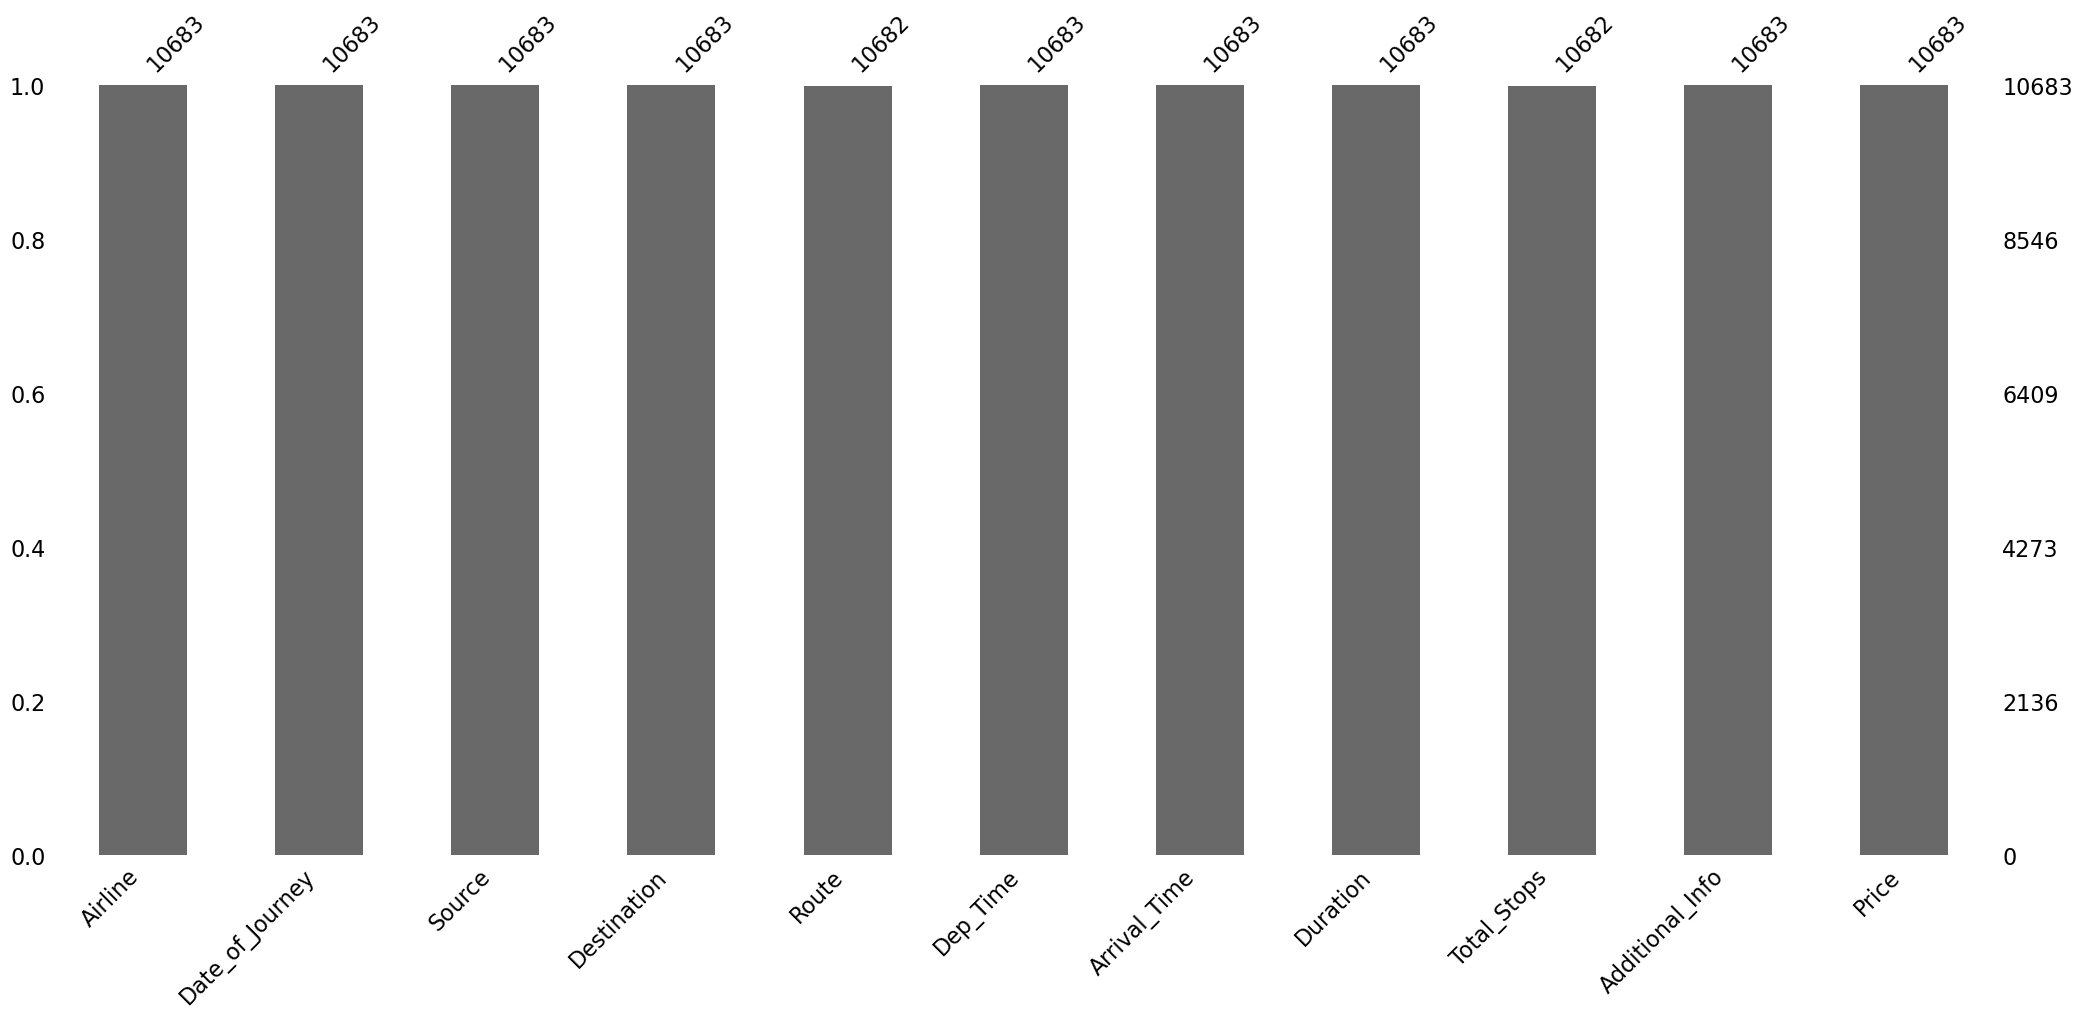

In [9]:
msno.bar(df)
plt.show

In [10]:
# We identify two instances of missing values, 
# and it is feasible to promptly eliminate these entries, given their minimal occurrence.
df.dropna(inplace= True)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Data Cleaning
***

In [12]:
# Datatypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
# # The data types of `Date_of_journey`, `Arrival_Time`, and `Dep_Time` are currently defined as objects. 
# To facilitate accurate prediction, it is imperative to convert them into date and time formats.

# Utilizing the `dt.day` method will extract the day from the given date, 
# while the `dt.month` method will specifically extract the month information.

def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [16]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
# Subsequently, we extract the day and month from the 'Date_of_journey' and store them in two separate columns.
# As a result, the 'Date_of_Journey' column becomes redundant, and we proceed to drop it.

df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month

In [18]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-13 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-13 05:50:00,2023-12-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-13 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-12-13 18:05:00,2023-12-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-12-13 16:50:00,2023-12-13 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2023-12-13 09:00:00,2023-12-13 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-12-13 18:55:00,2023-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2023-12-13 08:00:00,2023-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-12-13 08:55:00,2023-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2023-12-13 11:25:00,2023-12-13 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [19]:
df.drop('Date_of_Journey', axis=1, inplace= True)

In [20]:
# Extracting hours and minutes from the 'Arrival_time' and 'Dept_time' features, 
# we store them in new columns before subsequently dropping the original columns.

# Function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col, axis=1, inplace= True)

In [21]:
# Execute the function.
# Departure time denotes the moment a plane departs from the gate.
# Similar to the process applied to 'Date_of_Journey,' we can extract relevant values from 'Dep_Time.'

extract_hour(df,'Dep_Time')

# Extracting minutes
extract_min(df,'Dep_Time')

# Drop the column
drop_col(df,'Dep_Time')

In [22]:
# Extracting hour
extract_hour(df,'Arrival_Time')

# Extracting min
extract_min(df,'Arrival_Time')


# Drop the column
drop_col(df,'Arrival_Time')

In [23]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [24]:
# Let's carry out pre-processing on the 'duration' column
# by isolating the duration hours and minutes from the duration values.

duration= list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains hour only
             duration[i]=duration[i] + ' 0m' # Adds zero minute
        else: 
             duration[i]='0h '+ duration[i]

In [25]:
df['duration']= duration
# fix duplicate on this

In [26]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2h 50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7h 25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19h 0m
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5h 25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4h 45m


In [27]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]


In [28]:
df['dur_hour']= df['Duration'].apply(hour)

In [33]:
df['dur_min']=df['Duration'].apply(minutes)

In [34]:
def minutes(x):
    split_values = x.split(' ')
    if len(split_values) == 2:
        return split_values[1][0:-1]
    else:
        return None  

df['dur_min'] = df['Duration'].apply(minutes)

In [35]:
df.head(10)

# fix no.2 dur_min

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2h 50m,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7h 25m,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19h 0m,19,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5h 25m,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4h 45m,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2h 25m,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15h 30m,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5,21h 5m,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25h 30m,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7h 50m,7,50


In [36]:
drop_col(df, 'Duration')

In [37]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration             object
dur_hour             object
dur_min              object
dtype: object

In [38]:
# Finding the categorical values

column= [column for column in df.columns if df[column].dtype=='object']

In [39]:
# Finding the continuous values

continuous_col = [column for column in df.columns if df[column].dtype!='object']

# Handling Categorical Data
***
We are using two main Encoding Techniques to covert Categorical data into some numerical format

#### Nominal data -- Data that are not in any order > one hot encoding
#### Ordinal data -- Data are in order > labelEncoder

In [40]:
categorical= df[column]

In [41]:
categorical.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,duration,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2h 50m,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7h 25m,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19h 0m,19,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5h 25m,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4h 45m,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,2h 25m,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,15h 30m,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,21h 5m,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,25h 30m,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,7h 50m,7,50


In [42]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airline vs Price Analysis
***

<Axes: xlabel='Airline', ylabel='Price'>

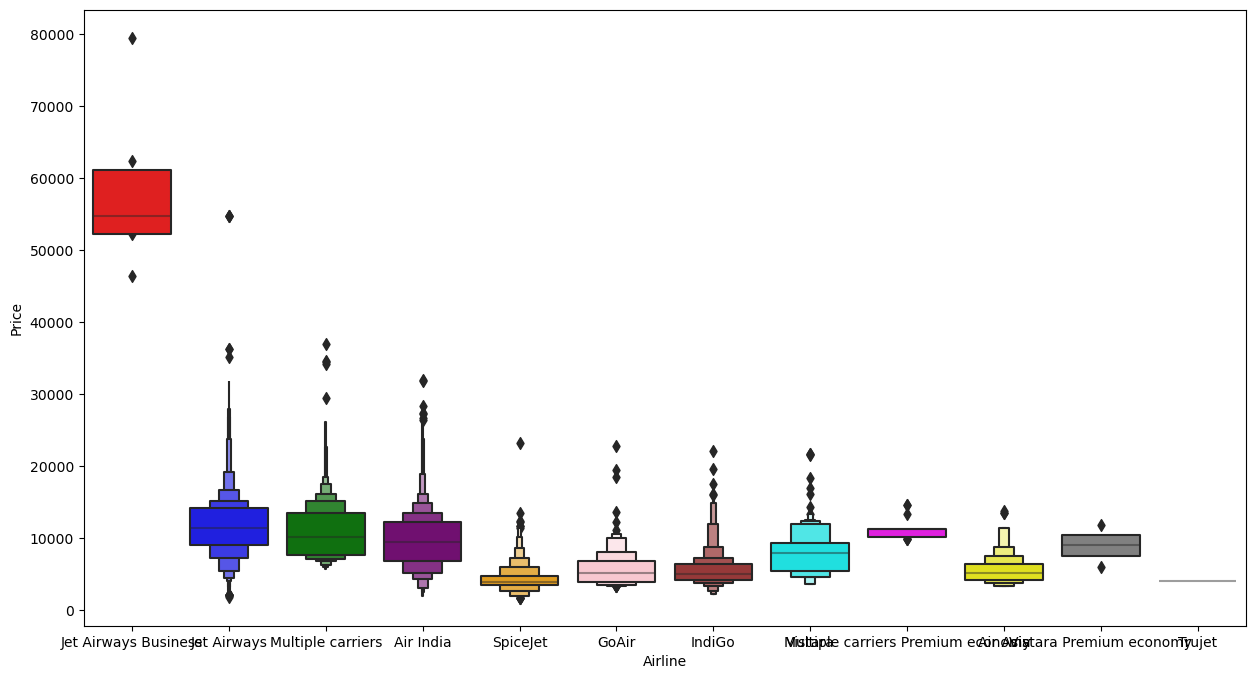

In [43]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'yellow', 'grey', 'lightgreen']

plt.figure(figsize=(15, 8))
sns.boxenplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False), palette=colors)

#### The graphical representation indicates that Jet Airways Business exhibits the highest pricing, while the remaining airlines, with the exception of the first one, display relatively similar median prices.


### Perform Total_Stops vs Price Analysis
***

<Axes: xlabel='Total_Stops', ylabel='Price'>

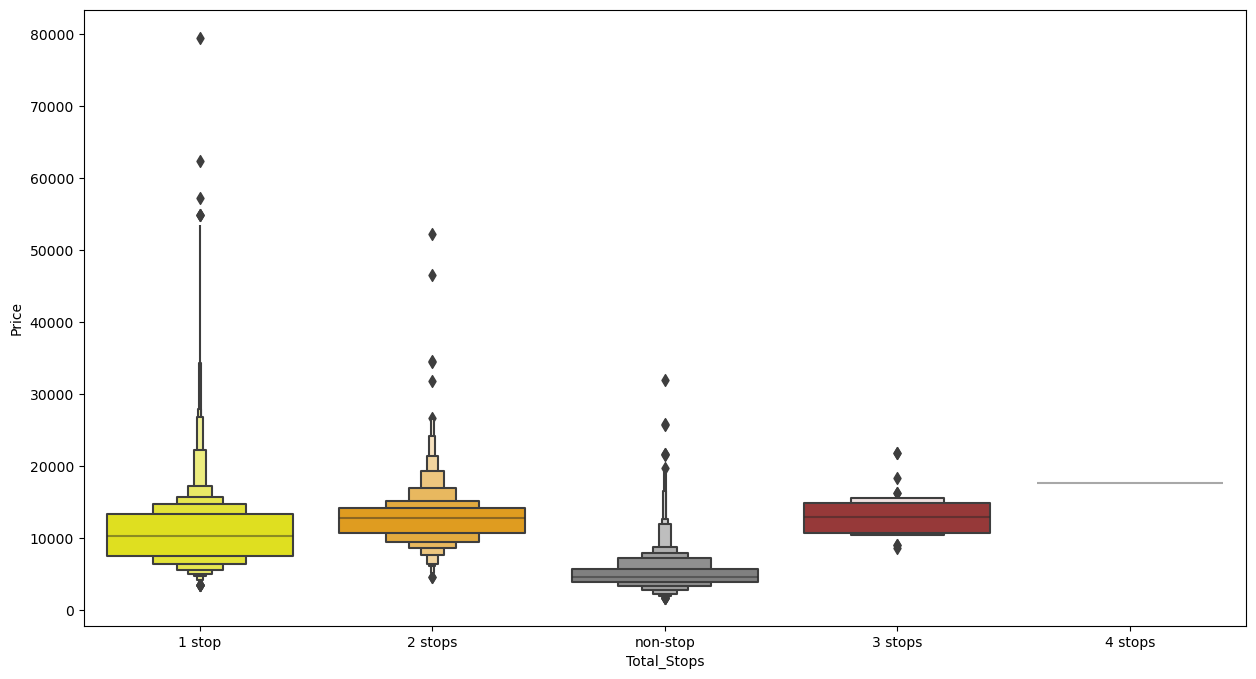

In [44]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending= False), palette=['yellow', 'orange', 'grey', 'brown', 'blue'])

In [45]:
# Since the airline data is nominal categorical, we will apply One-Hot Encoding.
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [46]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [47]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#### Source vs Price

<Axes: xlabel='Source', ylabel='Price'>

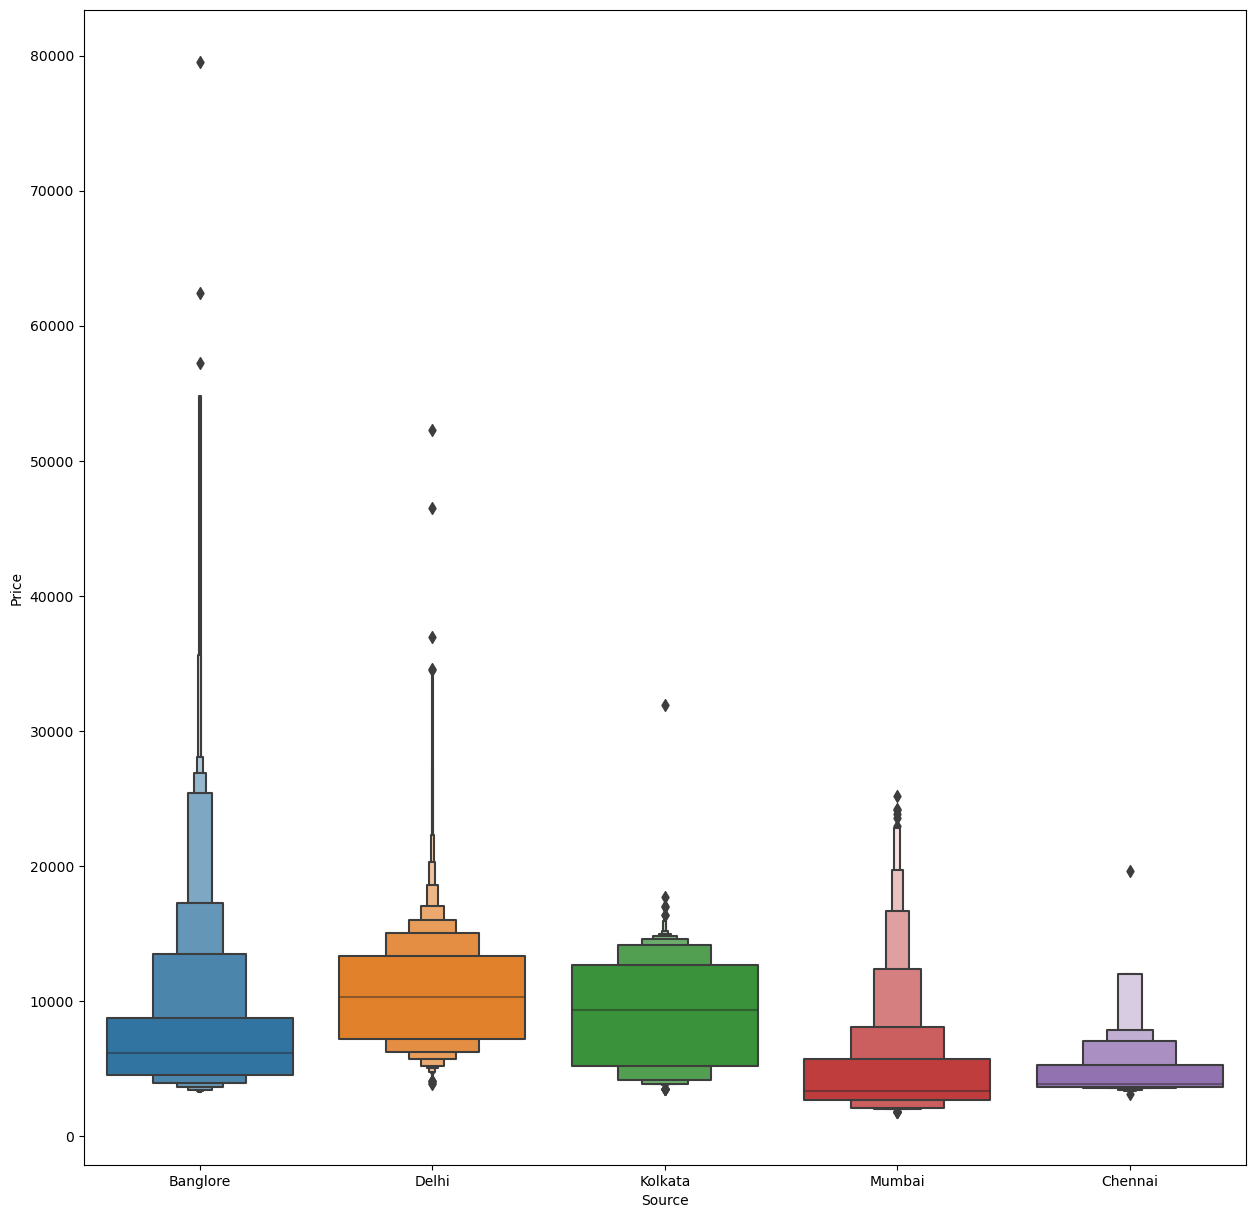

In [48]:
plt.figure(figsize=(15,15))
sns.boxenplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [49]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [50]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

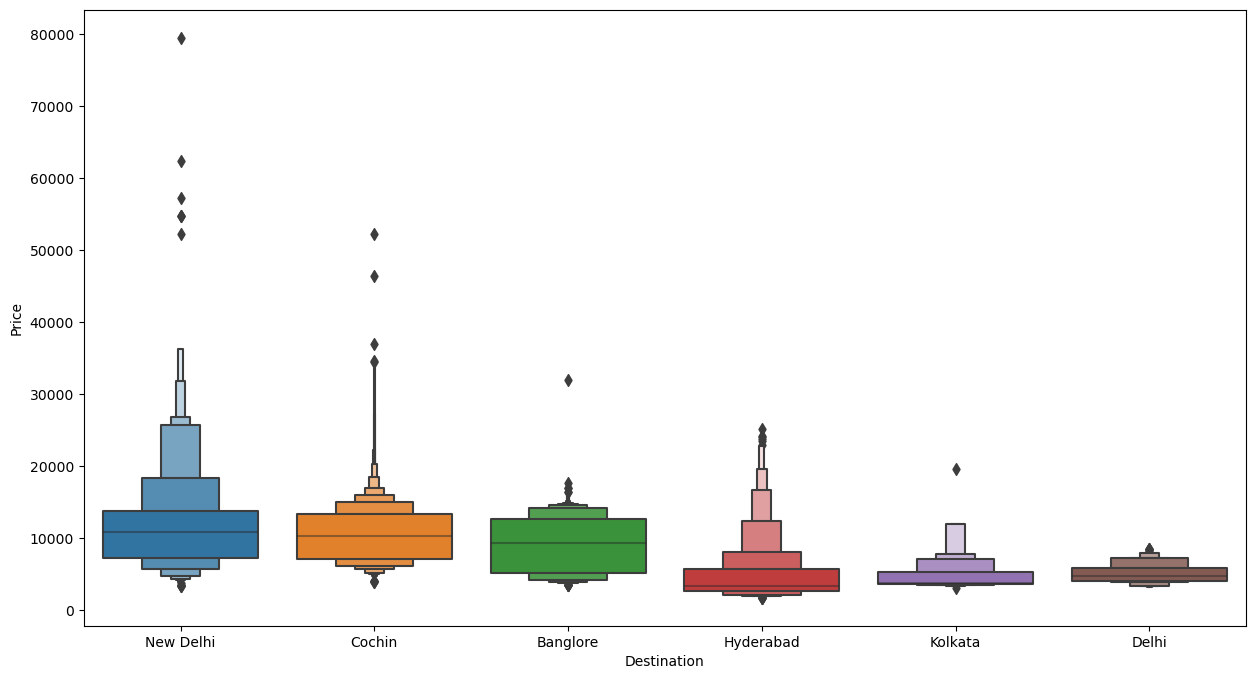

In [51]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [52]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [53]:
# now work on route column
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [54]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [55]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,duration,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2h 50m,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7h 25m,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19h 0m,19,None,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5h 25m,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4h 45m,4,45,BLR,NAG,DEL,NaN,NaN


In [56]:
drop_col(categorical, 'Route')

In [57]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
duration               0
dur_hour               0
dur_min             1032
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [58]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'duration', 'dur_hour', 'dur_min', 'Route1', 'Route2', 'Route3',
       'Route4', 'Route5'],
      dtype='object')

In [59]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [60]:
categorical.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
duration              0
dur_hour              0
dur_min            1032
Route1                0
Route2                0
Route3                0
Route4                0
Route5                0
dtype: int64

In [61]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
duration has total 368 categories
dur_hour has total 43 categories
dur_min has total 11 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


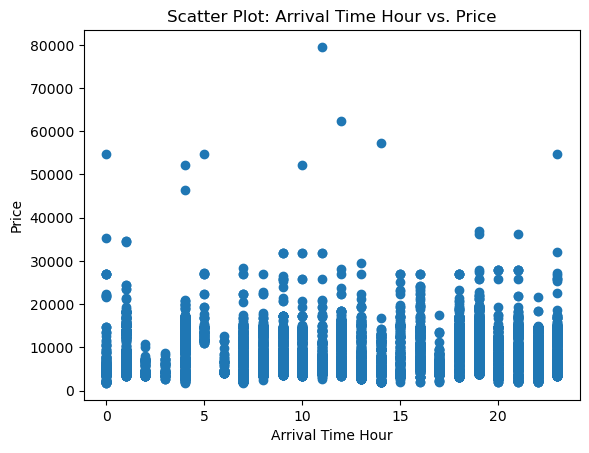

In [62]:
plt.scatter(df['Arrival_Time_hour'], df['Price'])
plt.xlabel('Arrival Time Hour')
plt.ylabel('Price')
plt.title('Scatter Plot: Arrival Time Hour vs. Price')

plt.show()

In [63]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [64]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [65]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,duration,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,2h 50m,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,7h 25m,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,19h 0m,19,None,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,5h 25m,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,4h 45m,4,45,0,34,8,13,5


In [66]:
drop_col(categorical, 'Additional_Info')

In [67]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [69]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [70]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

## Model

In [95]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [96]:
final_df.head()

,Total_Stops,duration,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,0,2h 50m,2,50,0,13,29,13,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10
1,2,7h 25m,7,25,2,25,1,3,5,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15
2,2,19h 0m,19,None,3,32,4,5,5,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25
3,1,5h 25m,5,25,2,34,3,13,5,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30
4,1,4h 45m,4,45,0,34,8,13,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35


In [97]:
pd.set_option('display.max_columns',33)
final_df.head()

,Total_Stops,duration,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,0,2h 50m,2,50,0,13,29,13,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10
1,2,7h 25m,7,25,2,25,1,3,5,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15
2,2,19h 0m,19,None,3,32,4,5,5,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25
3,1,5h 25m,5,25,2,34,3,13,5,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30
4,1,4h 45m,4,45,0,34,8,13,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35


### Checking for outliers
***

In [98]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

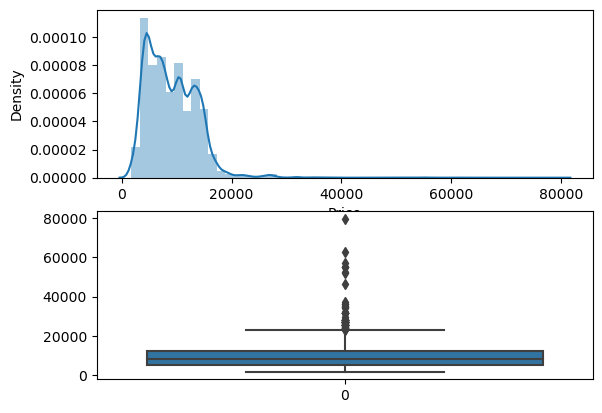

In [99]:
plot(final_df, 'Price')

###  Handling outliers:
#### As there is some outliers in price feature,so we replace it  with median.

In [100]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

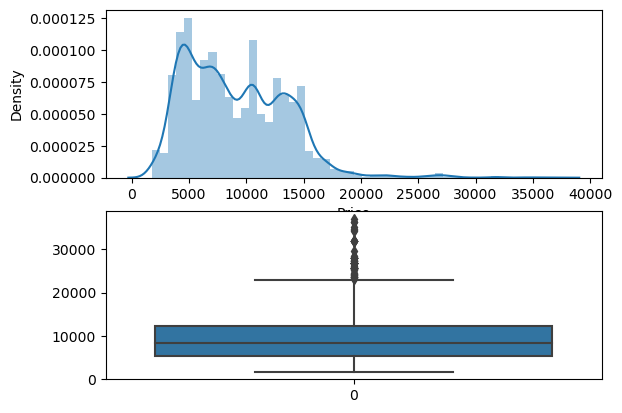

In [101]:
plot(final_df, 'Price')

### Separate the dataset in X and Y columns

In [102]:
X= final_df.drop('Price',axis=1)
y= df['Price']

## Feature Selection 
***
This revolves around identifying the optimal feature that exhibits a strong relationship with the independent variable, consequently mitigating issues associated with dimensionality reduction. To address this, we employ the mutual_info_classif method.

In [103]:
from sklearn.feature_selection import mutual_info_classif


In [112]:
mutual_info_classif(X,y)

ValueError: could not convert string to float: '2h 50m'

In [113]:
imp= pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

ValueError: could not convert string to float: '2h 50m'

In [114]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

NameError: name 'imp' is not defined

#### As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

## Models

In [115]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [116]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)       

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [118]:
predict(RandomForestRegressor())

Model is: RandomForestRegressor()


ValueError: could not convert string to float: '1h 30m'

##### From the graph,it is clear that we predicted 84% correctly.

In [119]:
predict(LogisticRegression())

    

Model is: LogisticRegression()


ValueError: could not convert string to float: '1h 30m'

In [120]:
predict(KNeighborsRegressor())


Model is: KNeighborsRegressor()


ValueError: could not convert string to float: '1h 30m'

In [121]:
predict(DecisionTreeRegressor())

Model is: DecisionTreeRegressor()


ValueError: could not convert string to float: '1h 30m'

In [122]:
from sklearn.svm import SVR
predict(SVR())

Model is: SVR()


ValueError: could not convert string to float: '1h 30m'

In [123]:
predict(GradientBoostingRegressor())

Model is: GradientBoostingRegressor()


ValueError: could not convert string to float: '1h 30m'

## Hyper tuning the model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

In [ ]:
# best parameter
rf_random.best_params_

In [ ]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [ ]:
r2_score(y_test,prediction)

### After hypertuning,the accuracy increases .
